In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

matplotlib.rc('font', family='Nanumgothic')
matplotlib.rc('axes', unicode_minus=False)
%matplotlib inline

In [2]:
data = pd.read_csv("/home/piai/바탕화면/bigdata/종합실습1/Origin_Cars(1).csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Price              6200 non-null   float64
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 736.8+ KB


In [3]:
data

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN
1,Hyundai,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN
2,Honda,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh
3,Maruti,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN
4,Audi,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen,Hyderabad,NaN,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN
7249,Volkswagen,Mumbai,NaN,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN
7250,Nissan,Kolkata,NaN,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN
7251,Volkswagen,Pune,NaN,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN


In [4]:
df=data[:]

In [5]:
# df = df[df['Fuel_Type'] != 'Electric']
# df['Fuel_Type'].unique()

In [6]:
df = df.dropna(subset=('Power'))
df

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN
1,Hyundai,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN
2,Honda,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh
3,Maruti,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN
4,Audi,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen,Hyderabad,NaN,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN
7249,Volkswagen,Mumbai,NaN,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN
7250,Nissan,Kolkata,NaN,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN
7251,Volkswagen,Pune,NaN,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN


In [7]:
df.shape

(7078, 13)

In [8]:
df = df.dropna(subset =('Seats'))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7075 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7075 non-null   object 
 1   Location           7075 non-null   object 
 2   Price              6055 non-null   float64
 3   Year               7075 non-null   int64  
 4   Kilometers_Driven  7075 non-null   int64  
 5   Fuel_Type          7075 non-null   object 
 6   Transmission       7075 non-null   object 
 7   Owner_Type         7075 non-null   object 
 8   Mileage            7073 non-null   float64
 9   Engine             7075 non-null   float64
 10  Power              7075 non-null   float64
 11  Seats              7075 non-null   float64
 12  New_Price          1006 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 773.8+ KB


In [9]:
df = df.drop(columns='New_Price', axis=1)
df.reset_index(drop=True, inplace=True)
df

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0
1,Hyundai,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0
2,Honda,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0
3,Maruti,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0
4,Audi,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7070,Volkswagen,Hyderabad,NaN,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0
7071,Volkswagen,Mumbai,NaN,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0
7072,Nissan,Kolkata,NaN,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0
7073,Volkswagen,Pune,NaN,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0


In [10]:
np.log(200000)
df = df[(df['Price']<200000) | (df['Price'].isnull())]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7074 entries, 0 to 7074
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7074 non-null   object 
 1   Location           7074 non-null   object 
 2   Price              6054 non-null   float64
 3   Year               7074 non-null   int64  
 4   Kilometers_Driven  7074 non-null   int64  
 5   Fuel_Type          7074 non-null   object 
 6   Transmission       7074 non-null   object 
 7   Owner_Type         7074 non-null   object 
 8   Mileage            7072 non-null   float64
 9   Engine             7074 non-null   float64
 10  Power              7074 non-null   float64
 11  Seats              7074 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 718.5+ KB


In [11]:
df = df[(df['Price']>600) | (df['Price'].isnull())]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7073 entries, 0 to 7074
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7073 non-null   object 
 1   Location           7073 non-null   object 
 2   Price              6053 non-null   float64
 3   Year               7073 non-null   int64  
 4   Kilometers_Driven  7073 non-null   int64  
 5   Fuel_Type          7073 non-null   object 
 6   Transmission       7073 non-null   object 
 7   Owner_Type         7073 non-null   object 
 8   Mileage            7071 non-null   float64
 9   Engine             7073 non-null   float64
 10  Power              7073 non-null   float64
 11  Seats              7073 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 718.4+ KB


In [12]:
df = df[df['Kilometers_Driven']<400000]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7066 entries, 0 to 7074
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7066 non-null   object 
 1   Location           7066 non-null   object 
 2   Price              6046 non-null   float64
 3   Year               7066 non-null   int64  
 4   Kilometers_Driven  7066 non-null   int64  
 5   Fuel_Type          7066 non-null   object 
 6   Transmission       7066 non-null   object 
 7   Owner_Type         7066 non-null   object 
 8   Mileage            7064 non-null   float64
 9   Engine             7066 non-null   float64
 10  Power              7066 non-null   float64
 11  Seats              7066 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 717.6+ KB


In [13]:
df = df[df['Mileage']>0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7030 entries, 0 to 7074
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7030 non-null   object 
 1   Location           7030 non-null   object 
 2   Price              6016 non-null   float64
 3   Year               7030 non-null   int64  
 4   Kilometers_Driven  7030 non-null   int64  
 5   Fuel_Type          7030 non-null   object 
 6   Transmission       7030 non-null   object 
 7   Owner_Type         7030 non-null   object 
 8   Mileage            7030 non-null   float64
 9   Engine             7030 non-null   float64
 10  Power              7030 non-null   float64
 11  Seats              7030 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 714.0+ KB


In [14]:
df = df.drop(columns='Engine', axis=1)

In [15]:
df_notnull=df.dropna(subset='Price', axis=0)
df_notnull.reset_index(drop=True, inplace=True)
df_notnull

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Power,Seats
0,Maruti,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,58.16,5.0
1,Hyundai,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,126.20,5.0
2,Honda,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,88.70,5.0
3,Maruti,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,88.76,7.0
4,Audi,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,140.80,5.0
...,...,...,...,...,...,...,...,...,...,...,...
6011,Datsun,Chennai,8477.27,2016,36000,Petrol,Manual,First,19.83,67.00,5.0
6012,Tata,Pune,10822.70,2016,41413,Diesel,Manual,First,27.28,69.00,5.0
6013,Ford,Kochi,13474.72,2017,39015,Petrol,Manual,First,17.00,121.36,5.0
6014,Jeep,Mumbai,27838.55,2018,6000,Petrol,Manual,First,16.00,160.00,5.0


In [16]:
df_null=df[df['Price'].isnull()]
df_null.reset_index(drop=True, inplace=True)
df_null

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Power,Seats
0,Maruti,Delhi,NaN,2014,40929,CNG,Manual,First,32.26,58.20,4.0
1,Maruti,Coimbatore,NaN,2013,54493,Petrol,Manual,Second,24.70,47.30,5.0
2,Hyundai,Mumbai,NaN,2014,29000,Petrol,Manual,First,18.50,82.85,5.0
3,Mahindra,Coimbatore,NaN,2016,85609,Diesel,Manual,Second,16.00,140.00,7.0
4,Toyota,Pune,NaN,2015,59000,Diesel,Automatic,First,12.55,168.70,7.0
...,...,...,...,...,...,...,...,...,...,...,...
1009,Volkswagen,Hyderabad,NaN,2011,89411,Diesel,Manual,First,20.54,103.60,5.0
1010,Volkswagen,Mumbai,NaN,2015,59000,Petrol,Automatic,First,17.21,103.60,5.0
1011,Nissan,Kolkata,NaN,2012,28000,Diesel,Manual,First,23.08,63.10,5.0
1012,Volkswagen,Pune,NaN,2013,52262,Petrol,Automatic,Third,17.20,103.60,5.0


> 건들지마라

In [17]:
car_brands = {
    'Korea':['Hyundai'],
    'Asia': ['Honda', 'Nissan', 'Toyota', 'Mitsubishi', 'Datsun', 'ISUZU'],
    'India':['Maruti', 'Tata', 'Mahindra',  'Hindustan', 'Ambassador','Force'],
    'Europe': ['Audi', 'Volkswagen', 'Land', 'Renault', 'Mercedes-Benz', 'BMW', 'Porsche', 'Jaguar', 'Volvo', 'Skoda', 'Mini', 'Fiat', 'Smart', 'Bentley', 'Lamborghini', 'OpelCorsa'],
    'North_A': ['Ford', 'Jeep', 'Chevrolet']
    }
brand_to_region = {brand: region for region, brands in car_brands.items() for brand in brands}
df_notnull['Name'] = df_notnull['Name'].map(brand_to_region)
df_notnull['Name'].unique()

array(['India', 'Korea', 'Asia', 'Europe', 'North_A'], dtype=object)

In [18]:
car_brands = {
    'Korea':['Hyundai'],
    'Asia': ['Honda', 'Nissan', 'Toyota', 'Mitsubishi', 'Datsun', 'ISUZU'],
    'India':['Maruti', 'Tata', 'Mahindra',  'Hindustan', 'Ambassador','Force'],
    'Europe': ['Audi', 'Volkswagen', 'Land', 'Renault', 'Mercedes-Benz', 'BMW', 'Porsche', 'Jaguar', 'Volvo', 'Skoda', 'Mini', 'Fiat', 'Smart', 'Bentley', 'Lamborghini', 'OpelCorsa'],
    'North_A': ['Ford', 'Jeep', 'Chevrolet']
    }
brand_to_region = {brand: region for region, brands in car_brands.items() for brand in brands}
df_null['Name'] = df_null['Name'].map(brand_to_region)
df_null['Name'].unique()

array(['India', 'Korea', 'Asia', 'Europe', 'North_A'], dtype=object)

In [19]:
df_null.shape

(1014, 11)

In [20]:
df_notnull.shape

(6016, 11)

In [21]:
Location = {'high' : ['Mumbai', 'Bangalore', 'Hyderabad','Chennai','Pune'],
            'mid' : ['Coimbatore', 'Ahmedabad', 'Kolkata', 'Delhi'],
            'low' : ['Jaipur', 'Kochi']}

location_to_level = {location: level for level, locations in Location.items() for location in locations}

df_notnull['Location'] = df_notnull['Location'].map(location_to_level)
df_notnull['Location'].unique()

array(['high', 'mid', 'low'], dtype=object)

In [22]:
Location = {'high' : ['Mumbai', 'Bangalore', 'Hyderabad','Chennai','Pune'],
            'mid' : ['Coimbatore', 'Ahmedabad', 'Kolkata', 'Delhi'],
            'low' : ['Jaipur', 'Kochi']}

location_to_level = {location: level for level, locations in Location.items() for location in locations}

df_null['Location'] = df_null['Location'].map(location_to_level)
df_null['Location'].unique()

array(['mid', 'high', 'low'], dtype=object)

In [23]:
df_null.shape

(1014, 11)

In [24]:
df_notnull.shape

(6016, 11)

In [25]:
df_null_dummy=df_null.rename(columns={'Owner_Type_Fourth & Above':'Owner_Type_Above'})
df_null_dummy=pd.get_dummies(df_null)

In [26]:
df_null_dummy

,Price,Year,Kilometers_Driven,Mileage,Power,Seats,Name_Asia,Name_Europe,Name_India,Name_Korea,...,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,NaN,2014,40929,32.26,58.20,4.0,0,0,1,0,...,1,0,0,0,0,1,1,0,0,0
1,NaN,2013,54493,24.70,47.30,5.0,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
2,NaN,2014,29000,18.50,82.85,5.0,0,0,0,1,...,0,0,0,1,0,1,1,0,0,0
3,NaN,2016,85609,16.00,140.00,7.0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4,NaN,2015,59000,12.55,168.70,7.0,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,NaN,2011,89411,20.54,103.60,5.0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
1010,NaN,2015,59000,17.21,103.60,5.0,0,1,0,0,...,0,0,0,1,1,0,1,0,0,0
1011,NaN,2012,28000,23.08,63.10,5.0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
1012,NaN,2013,52262,17.20,103.60,5.0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1


In [27]:
df_notnull_dummy=df_notnull.rename(columns={'Owner_Type_Fourth & Above':'Owner_Type_Above'})
df_notnull_dummy=pd.get_dummies(df_notnull)

In [28]:
df_null_dummy_x = df_null_dummy.drop(["Price"], axis = 1, inplace = False)
df_null_dummy_y = df_null_dummy["Price"]
df_null_dummy_x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       1014 non-null   int64  
 1   Kilometers_Driven          1014 non-null   int64  
 2   Mileage                    1014 non-null   float64
 3   Power                      1014 non-null   float64
 4   Seats                      1014 non-null   float64
 5   Name_Asia                  1014 non-null   uint8  
 6   Name_Europe                1014 non-null   uint8  
 7   Name_India                 1014 non-null   uint8  
 8   Name_Korea                 1014 non-null   uint8  
 9   Name_North_A               1014 non-null   uint8  
 10  Location_high              1014 non-null   uint8  
 11  Location_low               1014 non-null   uint8  
 12  Location_mid               1014 non-null   uint8  
 13  Fuel_Type_CNG              1014 non-null   uint8

In [29]:
# sns.pairplot(df_notnull)

In [30]:
# df_notnull_dummy.corr()[abs(df_notnull_dummy.corr())>0.5]

In [31]:
# df_notnull_dummy['Year']=2020-df_notnull_dummy['Year']
# df_notnull_dummy=df_notnull_dummy.drop(columns='Engine',axis=1)

In [32]:
df_notnull_dummy_x = df_notnull_dummy.drop(["Price"], axis = 1, inplace = False)
df_notnull_dummy_y = df_notnull_dummy["Price"]
df_notnull_dummy_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6016 entries, 0 to 6015
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       6016 non-null   int64  
 1   Kilometers_Driven          6016 non-null   int64  
 2   Mileage                    6016 non-null   float64
 3   Power                      6016 non-null   float64
 4   Seats                      6016 non-null   float64
 5   Name_Asia                  6016 non-null   uint8  
 6   Name_Europe                6016 non-null   uint8  
 7   Name_India                 6016 non-null   uint8  
 8   Name_Korea                 6016 non-null   uint8  
 9   Name_North_A               6016 non-null   uint8  
 10  Location_high              6016 non-null   uint8  
 11  Location_low               6016 non-null   uint8  
 12  Location_mid               6016 non-null   uint8  
 13  Fuel_Type_CNG              6016 non-null   uint8

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_notnull_dummy_x, df_notnull_dummy_y, test_size = 0.2, random_state = 5649)
df_test_x.shape

(1204, 23)

In [35]:
df_train_x.shape

(4812, 23)

In [36]:
df_test_x.shape

(1204, 23)

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

In [38]:
gb_final = GradientBoostingRegressor(random_state=1234,n_estimators = 80, min_samples_leaf = 3,
                                     min_samples_split = 4, max_depth = 6, learning_rate = 0.14)
gb_final.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set: 0.975
Score on test set: 0.872


In [39]:
from xgboost import XGBRegressor

In [94]:
xgb_final = XGBRegressor(random_state=1234,
                            max_depth=6, 
                          n_estimators=100, 
                          learning_rate=0.18)
xgb_final.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(xgb_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(xgb_final.score(df_test_x, df_test_y)))

Score on training set: 0.984
Score on test set: 0.870


In [41]:
v_feature_name = df_train_x.columns

df_importance0 = pd.DataFrame()
df_importance0 ["Feature"] = v_feature_name
df_importance0 ["Importance"] = xgb_final.feature_importances_

df_importance0 .sort_values("Importance", ascending=False, inplace = True)
df_importance0 .round(3)

,Feature,Importance
3,Power,0.389
6,Name_Europe,0.153
0,Year,0.102
17,Transmission_Automatic,0.061
7,Name_India,0.052
14,Fuel_Type_Diesel,0.051
4,Seats,0.032
2,Mileage,0.024
1,Kilometers_Driven,0.022
8,Name_Korea,0.018


Text(0, 0.5, '설명변수')

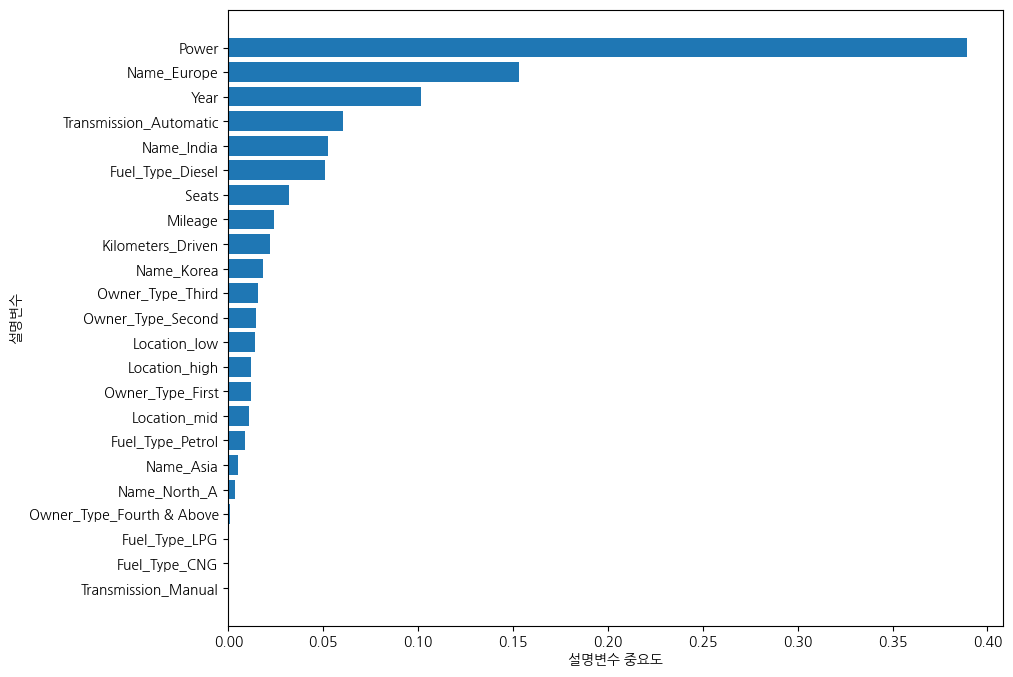

In [42]:
fig, ax = plt.subplots(figsize=(10, 8))

df_importance0 .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance0 ))
plt.barh(y = coordinates, width = df_importance0 ["Importance"])
plt.yticks(coordinates, df_importance0["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [45]:
test_pred =gb_final.predict(df_null_dummy_x)

In [46]:
test=pd.DataFrame(test_pred)
test

,0
0,5313.183448
1,3359.134680
2,6841.715730
3,18873.046279
4,37602.556810
...,...
1009,6156.510011
1010,9142.225353
1011,4352.676908
1012,6403.893126


In [47]:
df_null_dummy['Price']=test

In [49]:
Interpolation=pd.concat([df_null_dummy,df_notnull_dummy],axis=0)
Interpolation.reset_index(drop=True, inplace=True)
Interpolation

,Price,Year,Kilometers_Driven,Mileage,Power,Seats,Name_Asia,Name_Europe,Name_India,Name_Korea,...,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,5313.183448,2014,40929,32.26,58.20,4.0,0,0,1,0,...,1,0,0,0,0,1,1,0,0,0
1,3359.134680,2013,54493,24.70,47.30,5.0,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
2,6841.715730,2014,29000,18.50,82.85,5.0,0,0,0,1,...,0,0,0,1,0,1,1,0,0,0
3,18873.046279,2016,85609,16.00,140.00,7.0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4,37602.556810,2015,59000,12.55,168.70,7.0,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7025,8477.270000,2016,36000,19.83,67.00,5.0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,0
7026,10822.700000,2016,41413,27.28,69.00,5.0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
7027,13474.720000,2017,39015,17.00,121.36,5.0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
7028,27838.550000,2018,6000,16.00,160.00,5.0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0


In [50]:
Interpolation_x = Interpolation.drop(["Price"], axis = 1, inplace = False)
Interpolation_y = Interpolation["Price"]
Interpolation_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7030 entries, 0 to 7029
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       7030 non-null   int64  
 1   Kilometers_Driven          7030 non-null   int64  
 2   Mileage                    7030 non-null   float64
 3   Power                      7030 non-null   float64
 4   Seats                      7030 non-null   float64
 5   Name_Asia                  7030 non-null   uint8  
 6   Name_Europe                7030 non-null   uint8  
 7   Name_India                 7030 non-null   uint8  
 8   Name_Korea                 7030 non-null   uint8  
 9   Name_North_A               7030 non-null   uint8  
 10  Location_high              7030 non-null   uint8  
 11  Location_low               7030 non-null   uint8  
 12  Location_mid               7030 non-null   uint8  
 13  Fuel_Type_CNG              7030 non-null   uint8

In [51]:
Interpolation_x

,Year,Kilometers_Driven,Mileage,Power,Seats,Name_Asia,Name_Europe,Name_India,Name_Korea,Name_North_A,...,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2014,40929,32.26,58.20,4.0,0,0,1,0,0,...,1,0,0,0,0,1,1,0,0,0
1,2013,54493,24.70,47.30,5.0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
2,2014,29000,18.50,82.85,5.0,0,0,0,1,0,...,0,0,0,1,0,1,1,0,0,0
3,2016,85609,16.00,140.00,7.0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
4,2015,59000,12.55,168.70,7.0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7025,2016,36000,19.83,67.00,5.0,1,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
7026,2016,41413,27.28,69.00,5.0,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
7027,2017,39015,17.00,121.36,5.0,0,0,0,0,1,...,0,0,0,1,0,1,1,0,0,0
7028,2018,6000,16.00,160.00,5.0,0,0,0,0,1,...,0,0,0,1,0,1,1,0,0,0


In [52]:
df_train_x2, df_test_x2, df_train_y2, df_test_y2 = train_test_split(Interpolation_x, Interpolation_y, test_size = 0.2, random_state = 5649)
df_test_x2.shape

(1406, 23)

In [53]:
gb_final2 = GradientBoostingRegressor(random_state=1234,n_estimators = 100, min_samples_leaf = 4,
                                     min_samples_split = 5, max_depth = 6, learning_rate = 0.14)
gb_final2.fit(df_train_x2, df_train_y2)

print("Score on training set: {:.3f}".format(gb_final2.score(df_train_x2, df_train_y2)))
print("Score on test set: {:.3f}".format(gb_final2.score(df_test_x2, df_test_y2)))

Score on training set: 0.973
Score on test set: 0.882


In [54]:
from xgboost import XGBRegressor

In [55]:
df_train_y3=pd.DataFrame(np.log(df_train_y2))
df_test_y3=pd.DataFrame(np.log(df_test_y2))

In [56]:
xgb_final2 = XGBRegressor(max_depth=6, 
                          n_estimators=120, 
                          learning_rate=0.19)
xgb_final2.fit(df_train_x2, df_train_y2)

print("Score on training set: {:.3f}".format(xgb_final2.score(df_train_x2, df_train_y2)))
print("Score on test set: {:.3f}".format(xgb_final2.score(df_test_x2, df_test_y2)))

Score on training set: 0.987
Score on test set: 0.885


In [57]:
v_feature_name = df_train_x2.columns

df_importance = pd.DataFrame()
df_importance ["Feature"] = v_feature_name
df_importance ["Importance"] = gb_final2.feature_importances_

df_importance .sort_values("Importance", ascending=False, inplace = True)
df_importance .round(3)

,Feature,Importance
3,Power,0.699
0,Year,0.181
2,Mileage,0.037
1,Kilometers_Driven,0.030
6,Name_Europe,0.024
4,Seats,0.009
18,Transmission_Manual,0.003
17,Transmission_Automatic,0.003
12,Location_mid,0.003
14,Fuel_Type_Diesel,0.003


In [58]:
v_feature_name = df_train_x2.columns

df_importance2 = pd.DataFrame()
df_importance2 ["Feature"] = v_feature_name
df_importance2 ["Importance"] = xgb_final2.feature_importances_

df_importance2 .sort_values("Importance", ascending=False, inplace = True)
df_importance2 .round(3)

,Feature,Importance
3,Power,0.410
6,Name_Europe,0.158
0,Year,0.112
17,Transmission_Automatic,0.060
7,Name_India,0.044
14,Fuel_Type_Diesel,0.037
4,Seats,0.033
8,Name_Korea,0.024
2,Mileage,0.021
1,Kilometers_Driven,0.019


Text(0, 0.5, '설명변수')

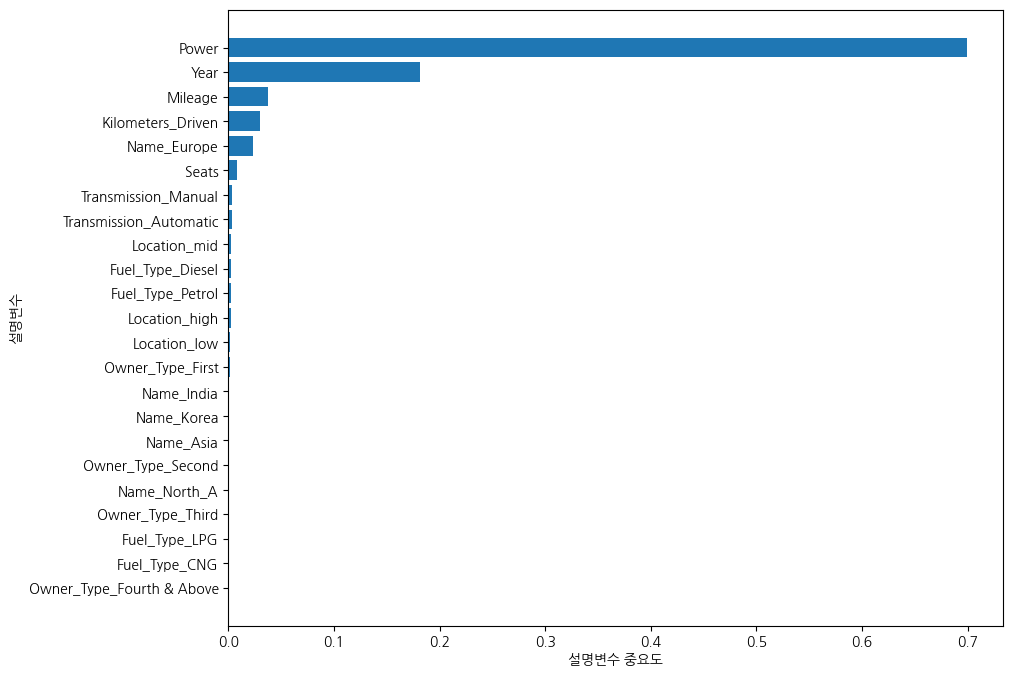

In [59]:
fig, ax = plt.subplots(figsize=(10, 8))

df_importance .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance ))
plt.barh(y = coordinates, width = df_importance ["Importance"])
plt.yticks(coordinates, df_importance ["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

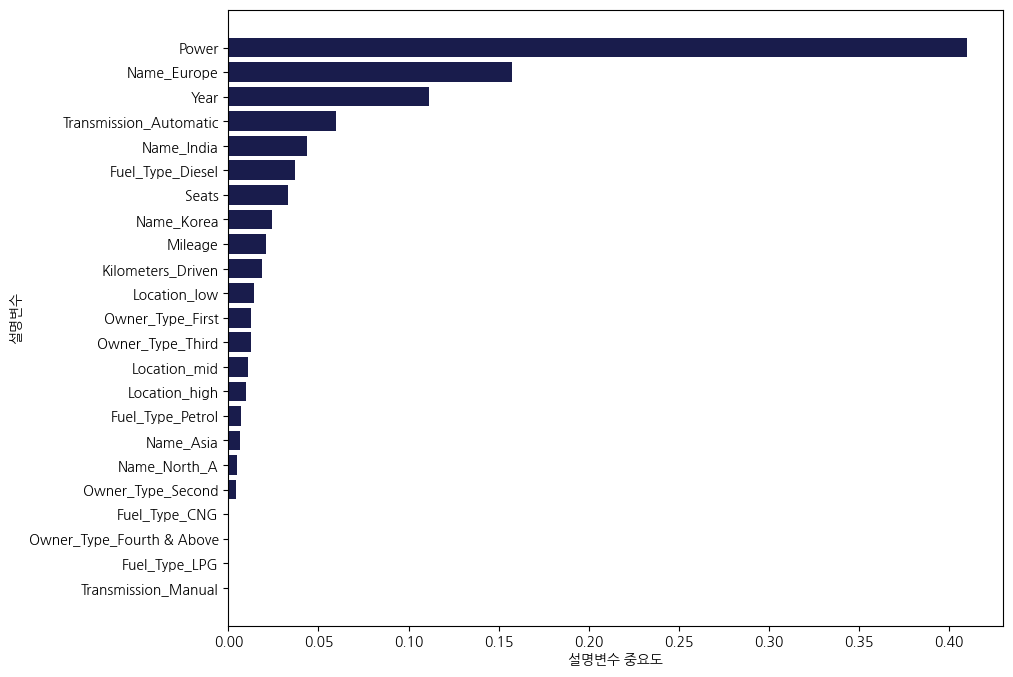

In [60]:
fig, ax = plt.subplots(figsize=(10, 8))

df_importance2 .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance2 ))
plt.barh(y = coordinates, width = df_importance2 ["Importance"],color = '#191c4cff')
plt.yticks(coordinates, df_importance2 ["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

plt.savefig('./Result.png')

In [67]:
df_test_y2=pd.DataFrame(df_test_y2)

[36705515.915682845, 35559143.03649836]
[6058.507730100115, 5963.148751833914]
[2534.676180366461, 2490.764883034507]
[0.17744053517075906, 0.1749619953526417]


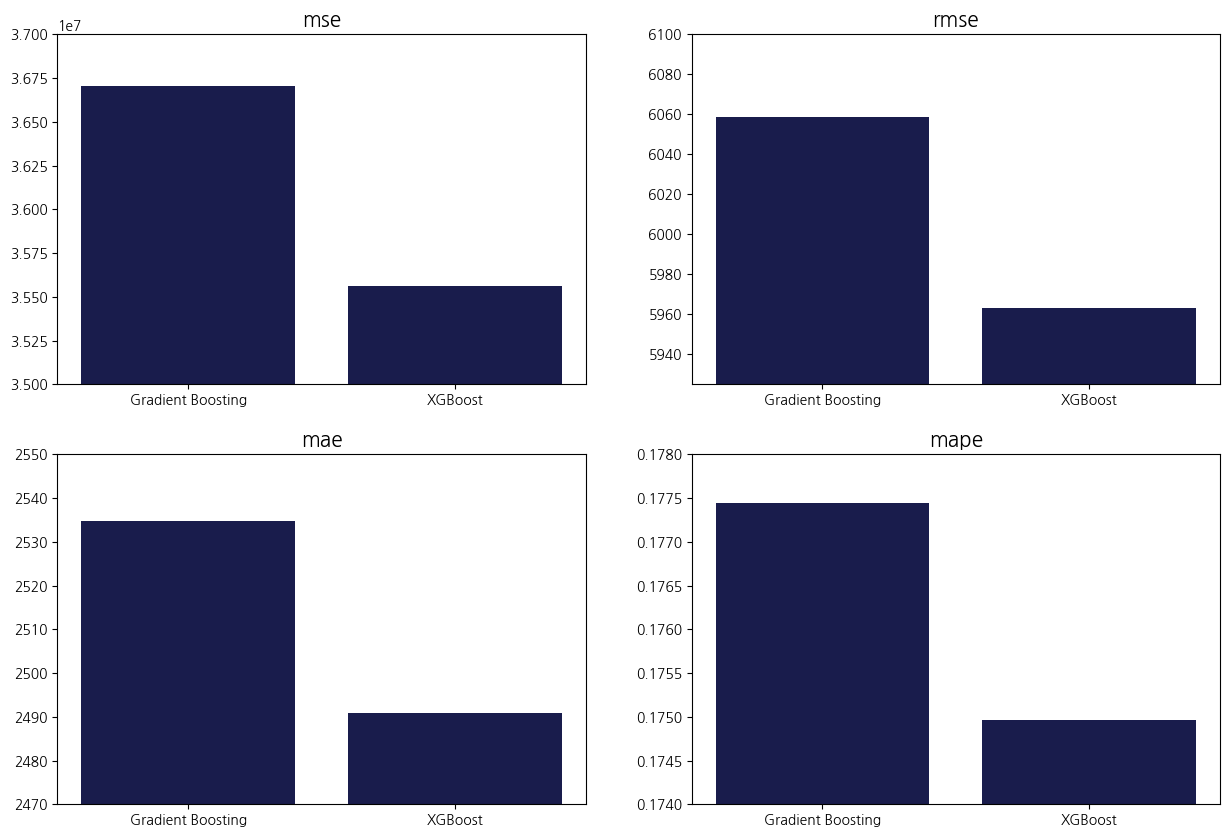

In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
mse, rmse, mae, mape = [],[],[],[]
models = ["Gradient Boosting", "XGBoost"]

gb_y_pred = gb_final2.predict(df_test_x2)
# 평가
mse.append(mean_squared_error(df_test_y2['Price'], gb_y_pred))
rmse.append(mean_squared_error(df_test_y2['Price'], gb_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y2['Price'], gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y2['Price'], gb_y_pred))
# XGBoost

xgb_y_pred = xgb_final2.predict(df_test_x2)
# 평가
mse.append(mean_squared_error(df_test_y2['Price'], xgb_y_pred))
rmse.append(mean_squared_error(df_test_y2['Price'], xgb_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y2['Price'], xgb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y2['Price'], xgb_y_pred))

fig, ax = plt.subplots(2, 2, figsize = (15,10))
color = '#191c4cff'  # Desired color
ax[0, 0].bar(models, mse, color=color)
ax[0, 0].set_title("mse").set_fontsize(15)
ax[0, 0].set_ylim(35000000, 37000000)
ax[0, 1].bar(models, rmse, color=color)
ax[0, 1].set_title("rmse").set_fontsize(15)
ax[0, 1].set_ylim(5925, 6100)
ax[1, 0].bar(models, mae, color=color)
ax[1, 0].set_title("mae").set_fontsize(15)
ax[1, 0].set_ylim(2470, 2550)
ax[1, 1].bar(models, mape, color=color)
ax[1, 1].set_title("mape").set_fontsize(15)
ax[1, 1].set_ylim(0.174, 0.178)

plt.savefig('./Result_MSE.png')

print(mse)
print(rmse)
print(mae)
print(mape)

In [61]:
# df_train_x.to_csv("df_train_x_notnull.csv", index = False)
# df_test_x.to_csv("df_test_x_notnull.csv", index = False)
# df_train_y.to_csv("df_train_y_notnull.csv", index = False)
# df_test_y.to_csv("df_test_y_notnull.csv", index = False)